# Исследование надёжности заёмщиков

## Шаг 1. Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd # импортирую библиотеку pandas
data = pd.read_csv('/datasets/data.csv') # чтение файла с данными и сохранение в data
display(data.head(50)) # получаем первые 10 строк из таблицы data

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [2]:
data.info() # общая информация о таблице data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


В таблице 12 столбцов со следующими типами данных: `float`, `int` и `object`.

Согласно документации к данным:
* `children` — количество детей в семье
* `days_employed` — общий трудовой стаж в днях
* `dob_years` — возраст клиента в годах
* `education` — уровень образования клиента
* `education_id` — идентификатор уровня образования
* `family_status` — семейное положение
* `family_status_id` — идентификатор семейного положения
* `gender` — пол клиента
* `income_type` — тип занятости
* `debt` — имел ли задолженность по возврату кредитов
* `total_income` — ежемесячный доход
* `purpose` — цель получения кредита

Столбец `debt` фактически имеет булевый тип  данных, хотя и представлен в формате `int`.  

Какие проблемы в данных есть на первый взгляд:
1. В колонках `total_income` и `days_employed` замечены одновременные пропуски в данных (NaN).
2. В столбце `education` одни и те же слова написаны под разным регистром. 
3. `days_employed` содердит отрицательные значения.

**Вывод**

Каждая строка таблицы содержит данные об одном клиенте банка. Большая часть колонок содержит личностную характеристику клиента, оставшиеся три - информация по его финансам и крединым возможностям.

В целом, информация пригодна для анализа и проверки гипотез, но необходимо устранить явные и неявные пропуки в данных, ошибки, привести одинаковые значения к одному регистру для дальнейшей категоризации, проверить на наличие дубликатов и устранить их. Также хотелось бы разделить таблицу на несколько поменьше для более удобной работы с данными.

In [3]:
display(data.describe())

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,1.935100e+04
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,1.674223e+05
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,1.029716e+05
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,1.030532e+05
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,1.450179e+05
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,2.034351e+05
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


## Шаг 2. Предобработка данных

### Обработка пропусков

Исследуем, есть ли пустые ячейки в таблице, и какие именно

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

Теперь ясно, что пропуски в `days_employed` и `total_income` как-то связаны сежду собой - их по `2174` в обоих столбцах. В остальных колонках при этом явных пропусков нет. Проверим эту гипотезу, посмотрев на таблицу, содержащую только пропущенные данные в одной из колонок:

In [5]:
display(data[data['days_employed'].isna()].head(10)) 

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу
65,0,NaN,21,среднее,1,Не женат / не замужем,4,M,компаньон,0,NaN,операции с коммерческой недвижимостью
67,0,NaN,52,высшее,0,женат / замужем,0,F,пенсионер,0,NaN,покупка жилья для семьи
72,1,NaN,32,высшее,0,женат / замужем,0,M,госслужащий,0,NaN,операции с коммерческой недвижимостью
82,2,NaN,50,высшее,0,женат / замужем,0,F,сотрудник,0,NaN,жилье
83,0,NaN,52,среднее,1,женат / замужем,0,M,сотрудник,0,NaN,жилье


Да, все подтвердилось. Там где `NaN` в `days_employed`, то же самое значение и в `total_income`, точнее - отсутствие какого-либо значения. Вероятно, это означает, что клиент не смог/не захотел предоставить информацию о трудовом стаже и доходе, либо была ошибка при выгрузке данных. Такие пропуски случаются не только среди пенсионеров, для которых отсутсвие стажа и дохода может быть нормой но и среди других категорий из числа работающих граждан. Поэтому можно заполнить пропуски средними значениями для каждой из категорий. 

Напишем цикл, который поможет быстро для заполненить пропуски среднестатистическим значением дохода и стажа по каждому типу занятости:

In [6]:
#income_types = data['income_type'].unique()# список всех уникальных типов дохода (пенсионер, сотрудник, госслужащий и т.д.)
#for income_type in income_types: # возьмем один элемент из списка типов дохода выше
#    income_type_data = data[data['income_type']==income_type] # Это таблица только с одним типом занятости (пенсионерами/госслужащищи/сотрудниками и тд)
#    #print('Это среднестатистический', income_type)
#    income_avg = income_type_data['total_income'].mean() # получим cредний доход для выюранного элемента 
#    #print('Его средний доход:', income_avg)
#    data.loc[(data['income_type']==income_type) & (data['total_income'].isna()), 'total_income'] = income_avg #Заполняю пропущенные значения средним доходом для определенного типа дохода в таблице
#    employed_avg = income_type_data['days_employed'].mean() # получим cреднее кличпество дней стажа для выбранного типа дохода
#    #print('Его средний стаж:', employed_avg)
#    data.loc[(data['income_type']==income_type) & (data['days_employed'].isna()), 'days_employed'] = employed_avg # Заполняю пропущенные значения средним стажем по текущему типу дохода


    
    
    

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [8]:
data['total_income']= data['total_income'].fillna(data.groupby('income_type')['total_income'].transform('mean'))
data['days_employed']= data['days_employed'].fillna(data.groupby('income_type')['days_employed'].transform('mean')) 

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       21525 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        21525 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [10]:
display(data[data['income_type']=='пенсионер'].head(10)) #Проверим, заполнились ли пропуски, например, в категории пенсионеров

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
12,0,365003.491245,65,среднее,1,гражданский брак,1,M,пенсионер,0,137127.465690,сыграть свадьбу
18,0,400281.136913,53,среднее,1,вдовец / вдова,2,F,пенсионер,0,56823.777243,на покупку подержанного автомобиля
24,1,338551.952911,57,среднее,1,Не женат / не замужем,4,F,пенсионер,0,290547.235997,операции с коммерческой недвижимостью
25,0,363548.489348,67,среднее,1,женат / замужем,0,M,пенсионер,0,55112.757732,покупка недвижимости
29,0,365003.491245,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,137127.465690,строительство жилой недвижимости
30,1,335581.668515,62,среднее,1,женат / замужем,0,F,пенсионер,0,171456.067993,операции с коммерческой недвижимостью
35,0,394021.072184,68,среднее,1,гражданский брак,1,M,пенсионер,0,77805.677436,на проведение свадьбы
50,0,353731.432338,63,среднее,1,женат / замужем,0,F,пенсионер,0,92342.730612,автомобили
55,0,365003.491245,54,среднее,1,гражданский брак,1,F,пенсионер,1,137127.465690,сыграть свадьбу


Пропусков нет. Проверим, нет ли строковых NaN-ов в столбцах:

In [11]:
display(data[data['days_employed']=='NaN'].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 12 columns):
children            0 non-null int64
days_employed       0 non-null float64
dob_years           0 non-null int64
education           0 non-null object
education_id        0 non-null int64
family_status       0 non-null object
family_status_id    0 non-null int64
gender              0 non-null object
income_type         0 non-null object
debt                0 non-null int64
total_income        0 non-null float64
purpose             0 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 0.0+ bytes


/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


None

In [12]:
display(data[data['total_income']=='NaN'].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 12 columns):
children            0 non-null int64
days_employed       0 non-null float64
dob_years           0 non-null int64
education           0 non-null object
education_id        0 non-null int64
family_status       0 non-null object
family_status_id    0 non-null int64
gender              0 non-null object
income_type         0 non-null object
debt                0 non-null int64
total_income        0 non-null float64
purpose             0 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 0.0+ bytes


None

**Вывод**

В таблице были пропуски одновременно и в столбцах стажа, и среднемесячного дохода клиентов. Эти пропуски были заполнены средними значениями для каждой из категорий. Также была произведена проверка на неявные пропуски, таких обнаружено не было.

### Замена типа данных

Некоторые значения в колонках `days_employed` и `total_income` представлены в виде вещественного числа и с большим количеством цифр после запятой. Это мешает визуальному анализу информации, а нецелое число дней стажа нам точно не интересно. Данные о зарплате после плавающей точки тоже вряд ли сильно повлияют на результат, поэтому отбросим эти цифры. 

In [13]:
data['days_employed'] = data['days_employed'].astype('int') # В данной ситуации подходит именно данный медтод, to_numeric() переводит только в тип данных float
data.info() # Смотрим, как изменился тип столбца 'days_employed'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       21525 non-null int64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        21525 non-null float64
purpose             21525 non-null object
dtypes: float64(1), int64(6), object(5)
memory usage: 2.0+ MB


`days_employed` теперь содержит только целые числа.

Аналогичным обиразом изменим тип колонки `total_income`

In [14]:
data['total_income'] = data['total_income'].astype('int') # Перезапишем столбец, используя метод astype().
data.info() # Посмотрим изменившуюся информацию по таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       21525 non-null int64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        21525 non-null int64
purpose             21525 non-null object
dtypes: int64(7), object(5)
memory usage: 2.0+ MB


**Вывод**

Данные столбцов `days_employed` и `total_income` были переведены в целочисленный тип `int`, т.к. данные после точки не несут критически важной для нас информации, которая могла бы повлиять на анализ платежеспособности клиента. Зато целые числа гораздо удобнее оценивать визуально, что может пригодиться в будущем.

In [15]:
for column in data.columns:
    print(" * Уникальные значения столбца " + str(column) + ", и их встречаемость:")
    print(data[column].value_counts())
    print()

 * Уникальные значения столбца children, и их встречаемость:
 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

 * Уникальные значения столбца days_employed, и их встречаемость:
-2326      1106
-2111       511
 365003     413
-3399       150
-327         16
           ... 
 371660       1
-11220        1
-7126         1
 373727       1
 344072       1
Name: days_employed, Length: 9087, dtype: int64

 * Уникальные значения столбца dob_years, и их встречаемость:
35    617
40    609
41    607
34    603
38    598
42    597
33    581
39    573
31    560
36    555
44    547
29    545
30    540
48    538
37    537
50    514
43    513
32    510
49    508
28    503
45    497
27    493
56    487
52    484
47    480
54    479
46    475
58    461
57    460
53    459
51    448
59    444
55    443
26    408
60    377
25    357
61    355
62    352
63    269
64    265
24    264
23    254
65    194
66    183
22    183
67

Выводы: 

1) Помимо -1 ребенка в колонке детей также настораживает большое число семей с 20 детьми, похоже на выброс. Этих значений немного - 76 шт., на общую статистику они вряд ли повлияют, поэтому их можно удалить.
    
2) Очень много отрицательных значений в графе трудового стажа тоже выглядят странно. Минусы могут быть следствием особенностей записи данных в другой базе. Надо проверить, сколько таких значений в принципе в таблице, и тогда будет понятно, ошибка это или особенность записи.
    
3) Заметила в столбце возраста 101-го младенца - это явно ошибка. Можно попробовать заполнить среднестатистическим возрастом.
    
4) Не совсем понятно, что означает пол XNA  - но т.к. он один такой среди более чем 20 тысяч F/M, то эту информацию можно проигнорировать.
    
5) Среди клиентов отностительно остальных всего 2 предпринимателя, 2 безработных, один студент и человек в декрете, но это не похоже на ошибку, просто можно взять на заметку.


In [16]:
median_age = data['dob_years'].sort_values().median() # Находим медианный возраст в выборке столбца. Средний возраст = 42

In [17]:
data.loc[data['dob_years']==0, 'dob_years'] = median_age # Меняем значения столбца, равные 0, на медианный возраст
print(data['dob_years'].unique()) # Смотрим, не осталось ли младенцев в графе возраста среди клиентов банка.

[42. 36. 33. 32. 53. 27. 43. 50. 35. 41. 40. 65. 54. 56. 26. 48. 24. 21.
 57. 67. 28. 63. 62. 47. 34. 68. 25. 31. 30. 20. 49. 37. 45. 61. 64. 44.
 52. 46. 23. 38. 39. 51. 59. 29. 60. 55. 58. 71. 22. 73. 66. 69. 19. 72.
 70. 74. 75.]


In [18]:
data = data.query('children != -1 and children != 20') # перезаписываю данные с помощью логического фильтра и метода query()
print(data['children'].value_counts()) # Смотрю, остались ли странные значения количества детей в столбце

0    14149
1     4818
2     2055
3      330
4       41
5        9
Name: children, dtype: int64


In [19]:
employed_days_negative = data.query('days_employed < 0')
print('Число дней "отрицательного" трудового стажа:', len(employed_days_negative))
#print(employed_days_negative.head())
employed_days_positive = data.query('days_employed > 0')
print('"Положительне" число дней трудового стажа:', len(employed_days_positive))

Число дней "отрицательного" трудового стажа: 17561
"Положительне" число дней трудового стажа: 3841


In [20]:
data.loc[data['days_employed'] < 0, 'days_employed'] = abs(data['days_employed'])
employed_days_negative = data.query('days_employed < 0')
print('Число дней "отрицательного" трудового стажа после обработки данных:', len(employed_days_negative))
employed_days_positive = data.query('days_employed > 0')
print('"Положительне" число дней трудового стажа:', len(employed_days_positive))    

Число дней "отрицательного" трудового стажа после обработки данных: 0
"Положительне" число дней трудового стажа: 21402


### Обработка дубликатов

In [21]:
print(data['dob_years'].mean())

43.496448930006544


Изучим уникальные значения в столбце `education`. В этой колонке при первичном визуальном осмотре были замечены дубликаты.

In [22]:
print(data['education'].unique()) # Выведем на экран все уникальные значения столбца

['высшее' 'среднее' 'Среднее' 'СРЕДНЕЕ' 'ВЫСШЕЕ' 'неоконченное высшее'
 'начальное' 'Высшее' 'НЕОКОНЧЕННОЕ ВЫСШЕЕ' 'Неоконченное высшее'
 'НАЧАЛЬНОЕ' 'Начальное' 'Ученая степень' 'УЧЕНАЯ СТЕПЕНЬ'
 'ученая степень']


Значения различаются только регистром, приведем все слова к одному регистру, чтобы выявить возможные неявные дубликаты

In [23]:
data['education'] = data['education'].str.lower() # Применим метод Pandas str.lower(), чтобы изменить регистр значений всей колонки

Посмотрим, что получилось

In [24]:
print(data['education'].unique()) # Выведем на экран новые уникальные значения столбца

['высшее' 'среднее' 'неоконченное высшее' 'начальное' 'ученая степень']


Все слова приведены к одному регистру, и дубликатов здесь больше нет, ура!

In [25]:
print('Повторяющихся строк в датасете:', data.duplicated().sum())
data = data.drop_duplicates()
print('Удалила дубликаты')
print('Повторяющихся строк в датасете теперь:', data.duplicated().sum())

Повторяющихся строк в датасете: 72
Удалила дубликаты
Повторяющихся строк в датасете теперь: 0


Теперь изучим столбец `purpose` на предмет неявных дубликатов

In [26]:
purpose_list = data['purpose'].unique() # Присвоим переменной новые уникальные значения столбца
print(purpose_list) # Выведем ее на экран 

['покупка жилья' 'приобретение автомобиля' 'дополнительное образование'
 'сыграть свадьбу' 'операции с жильем' 'образование'
 'на проведение свадьбы' 'покупка жилья для семьи' 'покупка недвижимости'
 'покупка коммерческой недвижимости' 'покупка жилой недвижимости'
 'строительство собственной недвижимости' 'недвижимость'
 'строительство недвижимости' 'на покупку подержанного автомобиля'
 'на покупку своего автомобиля' 'операции с коммерческой недвижимостью'
 'строительство жилой недвижимости' 'жилье'
 'операции со своей недвижимостью' 'автомобили' 'заняться образованием'
 'сделка с подержанным автомобилем' 'получение образования' 'автомобиль'
 'свадьба' 'получение дополнительного образования' 'покупка своего жилья'
 'операции с недвижимостью' 'получение высшего образования'
 'свой автомобиль' 'сделка с автомобилем' 'профильное образование'
 'высшее образование' 'покупка жилья для сдачи' 'на покупку автомобиля'
 'ремонт жилью' 'заняться высшим образованием']


Довольно много повторяющихся по смыслу целей, которые сложно оценить визуально.

**Вывод**

Вручную искать все похожие цели, чтобы обработать и заменить их c помощью функции - будет долго и тяжело. Поэтому логично будет прибегнуть к лемматизации для выявления схожих по смыслу целей и их объединения.


### Лемматизация

Импортируем библиотеку для лемматизации

In [27]:
from pymystem3 import Mystem # Импортируем часть библиотек для лемматизации
m = Mystem() # Для удобства использования называем переменной метод лемматизации

Определим словарные основы слов в столбце `purpose`,

In [28]:
purpose_text = ' '.join(purpose_list) # перевожу список целей в текстовый формат, чтобы лемматизировать

In [29]:
lemmas = m.lemmatize(purpose_text) # применяем метод лемматищации текста

In [30]:
print(lemmas) # Вывод спискаполученных лемм на экран

['покупка', ' ', 'жилье', ' ', 'приобретение', ' ', 'автомобиль', ' ', 'дополнительный', ' ', 'образование', ' ', 'сыграть', ' ', 'свадьба', ' ', 'операция', ' ', 'с', ' ', 'жилье', ' ', 'образование', ' ', 'на', ' ', 'проведение', ' ', 'свадьба', ' ', 'покупка', ' ', 'жилье', ' ', 'для', ' ', 'семья', ' ', 'покупка', ' ', 'недвижимость', ' ', 'покупка', ' ', 'коммерческий', ' ', 'недвижимость', ' ', 'покупка', ' ', 'жилой', ' ', 'недвижимость', ' ', 'строительство', ' ', 'собственный', ' ', 'недвижимость', ' ', 'недвижимость', ' ', 'строительство', ' ', 'недвижимость', ' ', 'на', ' ', 'покупка', ' ', 'подержать', ' ', 'автомобиль', ' ', 'на', ' ', 'покупка', ' ', 'свой', ' ', 'автомобиль', ' ', 'операция', ' ', 'с', ' ', 'коммерческий', ' ', 'недвижимость', ' ', 'строительство', ' ', 'жилой', ' ', 'недвижимость', ' ', 'жилье', ' ', 'операция', ' ', 'со', ' ', 'свой', ' ', 'недвижимость', ' ', 'автомобиль', ' ', 'заниматься', ' ', 'образование', ' ', 'сделка', ' ', 'с', ' ', 'подержать

В списке очень много повторений. Изучим уникальные значения лемматизированного списка целей

In [31]:
set_of_lemmas = set(lemmas) # Получение множества уникальных значений из списка повторяющихся слов
print(set(lemmas)) # Выведем на экран множесво уникальных слов, полученное из списка повторяющихся лемматизированных слов

{'строительство', 'собственный', 'дополнительный', 'получение', 'автомобиль', 'на', 'приобретение', ' ', 'недвижимость', 'сделка', 'жилье', 'проведение', 'для', 'семья', 'подержать', 'профильный', '\n', 'сдача', 'со', 'свой', 'коммерческий', 'покупка', 'операция', 'свадьба', 'заниматься', 'высокий', 'ремонт', 'жилой', 'с', 'образование', 'сыграть'}


Уберем из множества все, что точно не является целями - предлоги, пробелы, символы. Это все слова длинной менее 4 букв:

In [32]:
lemmas_list = list(set_of_lemmas)
for word in lemmas_list:
    if len(word) < 4:
        lemmas_list.remove(word)
print(lemmas_list)

['строительство', 'собственный', 'дополнительный', 'получение', 'автомобиль', 'приобретение', 'недвижимость', 'сделка', 'жилье', 'проведение', 'семья', 'подержать', 'профильный', 'сдача', 'свой', 'коммерческий', 'покупка', 'операция', 'свадьба', 'заниматься', 'высокий', 'ремонт', 'жилой', 'образование', 'сыграть']


Выберем вручную значимые слова из списка лемм

In [33]:
purpose_words = ['жилье', 'автомобиль', 'строительство', 'свадьба', 'ремонт', 'образование', 'недвижимость']

**Вывод**

Заявленные цели кредитов можно условно разделить на следующие:
* `Покупка, аренда или операции с недвижимостью/жиль`
* `Покупка автомобиля`
* `Проведение свадьбы`
* `Образование`
* `Ремонт и строительство`

### Категоризация данных

Разделим таблицу на несколько подтаблиц, содержащие следующие данные: 
* `семейный статус` и `задолженности`
* `количество детей` и `задолженности`
* `уровень дохода` и `задолженности`
* `цели кредита` и `задолженности`

Для каждой полученной таблицы сгруппируем данные и посчитаем отношение должников к общему количеству плательщиков по каждой из категорий. 

In [34]:
family_status_and_debt = data[['family_status', 'debt']] # Новая таблица на основе среза из таблицы data
family_status_and_debt_grouped = family_status_and_debt.groupby('family_status').agg({'debt' : ['count', 'sum']}) # Группируем данные новой таблицы и применяем к столбцу debt функции count (общее количество плательщиков по категории) и sum (число должников для каждой категории)
family_status_and_debt_grouped['relation'] = family_status_and_debt_grouped['debt']['sum'] / family_status_and_debt_grouped['debt']['count'] # Новый столбец, в котором будет соотношение должников к общему количеству клиентов группы
display(family_status_and_debt_grouped) #Вывод таблицы на экран

debt       relation
                       count  sum          
family_status                              
Не женат / не замужем   2796  273  0.097639
в разводе               1189   84  0.070648
вдовец / вдова           951   63  0.066246
гражданский брак        4133  385  0.093153
женат / замужем        12261  927  0.075606

In [35]:
children_and_debt = data[['children', 'debt']] # Новая таблица на основе среза из таблицы data
children_and_debt_grouped = children_and_debt.groupby('children').agg({'debt' : ['count', 'sum']}) # Группировка и применение функций к новой таблице
children_and_debt_grouped['relation'] = children_and_debt_grouped['debt']['sum'] / children_and_debt_grouped['debt']['count']  # Новый столбец, в котором будет соотношение должников к общему количеству клиентов группы
display(children_and_debt_grouped) #Вывод таблицы на экран 


debt        relation
          count   sum          
children                       
0         14090  1063  0.075444
1          4808   444  0.092346
2          2052   194  0.094542
3           330    27  0.081818
4            41     4  0.097561
5             9     0  0.000000

В колонке `children` есть значяение `-1`, но не бывает минус один ребенок, это точно какая-то ошибка. Относительно общего числа или семей с одним ребенком, к которым может относиться данная опечатка, количество значений небольное, 47. Поэтому эту строку можно удалить.

In [36]:
children_and_debt_grouped = children_and_debt_grouped.loc[children_and_debt_grouped.index!=-1] #Перезапись таблицы без ненужного столбца
display(children_and_debt_grouped) #Вывод таблицы на экран

debt        relation
          count   sum          
children                       
0         14090  1063  0.075444
1          4808   444  0.092346
2          2052   194  0.094542
3           330    27  0.081818
4            41     4  0.097561
5             9     0  0.000000

Теперь запишем функцию для категоризации по уровню дохода клиентов

In [37]:
income_counted = data['total_income'].value_counts() #Изучим, какие уровни доходов встречаются чаще всего
display(income_counted) #Вывод данных на экран

161380    1066
202417     497
137127     383
170898     144
177986       3
          ... 
130037       1
379891       1
278863       1
74734        1
264193       1
Name: total_income, Length: 18505, dtype: int64

In [38]:
 print(data['total_income'].max()) # Узнаем максимальный доход клиента из колонки

2265604


In [39]:
print(data['total_income'].min()) # Изучим минимальный доход из всей выборки

20667


In [40]:
print(int(data['total_income'].mean())) # Среднее значение дохода по всей выборке, но его объективность могут искажать редкие клиенты, зарабатывающие сильно больше остальных

167454


In [41]:
print(int(data['total_income'].sort_values().median())) # Медиана всего столбца доходов, более объективно отразит среднее значение дохода при выбивающихся значениях

151902


Напишем функцию, которая возвратит категорию клиента в зависимости от его заработка. Для определения пороговых значений нужен более глубокий анализ данных, пока же примерно определим уровни дохода "на глаз":) Пусть низким доходом будет считаться доход менее `70.000`, средним - от `70.001` по `170.000`, и высоким - от `170.001` и выше.

In [42]:
def income_lvl(income): # Определяю фцнкцию и ее аргумент
    if income <= 70000: # Условие, при котором значение аргумента не больше 70000
        return 'низкий доход' # При выполнении условия функция возвращает этот результат
    if income <= 170000: # Условие, при котором значение аргумента лежит в пределах от 70001 по 170000
        return 'средний доход' # При выполнении условия функция возвращает этот результат
    return 'высокий доход' # Для всех остальных случаев функция возвращает этот результат

print(income_lvl(10)) #Проверка работы функции

низкий доход


In [43]:
import warnings
warnings.filterwarnings('ignore')
    

In [44]:
total_income_and_debt = data[['total_income', 'debt']] # Новая таблица на основе среза из таблицы data
total_income_and_debt['income_level'] = total_income_and_debt['total_income'].apply(income_lvl) # Метод apply() для формирования новой колонки на основе функции
display(total_income_and_debt.head())  #Вывод данных на экран



,total_income,debt,income_level
0,253875,0,высокий доход
1,112080,0,средний доход
2,145885,0,средний доход
3,267628,0,высокий доход
4,158616,0,средний доход


In [45]:
total_income_and_debt_grouped = total_income_and_debt.groupby('income_level').agg({'debt' : ['count', 'sum']}) # Группировка и применение функций к новой таблице 
total_income_and_debt_grouped['relation'] = total_income_and_debt_grouped['debt']['sum'] / total_income_and_debt_grouped['debt']['count'] # Новый столбец, в котором будет соотношение должников к общему количеству клиентов группы
display(total_income_and_debt_grouped) # Вывод таблицы на экран

debt        relation
               count   sum          
income_level                        
высокий доход   7821   581  0.074287
низкий доход    1464   101  0.068989
средний доход  12045  1050  0.087173

Теперь категоризуем данные для колонки с целями. Ранее мы лемматизировали слова из этого столбца, напишем функцию, которая поможет анализировать одинаковые по смыслу цели:

In [46]:
purpose_words = ['жилье', 'автомобиль', 'строительство', 'свадьба', 'ремонт', 'образование', 'недвижимость'] # Всмомним, какие слова-цели из списка лемматизированных слов были выделены

def rename_purpose(row): # определяем функцию и ее аргумент - строку таблицы
    sentence = row['purpose'] # Присваиваем переменнтой значение строки из столбца целей
#     print(sentence)
    for word in sentence.split(): # Проходимся циклом по списку слов, полученному из строки целей
#         print(word)
        lemma = m.lemmatize(word)[0] # Лемматизиоуем слово из списка sentence
#         print(lemma)
#         break
        if lemma in purpose_words: # Проверяем, имеется ли лемматизированное слово в обработанном нами ранее списке целей
            return lemma # Если да, то функция возвращает это слово
    return 'другое' #Если такого слова нет - то возвращается строка "другое"

In [47]:
purpose_and_debt = data[['purpose', 'debt']]
purpose_and_debt['standartised_purpose'] = purpose_and_debt.apply(rename_purpose, axis=1)
display(purpose_and_debt.head())

,purpose,debt,standartised_purpose
0,покупка жилья,0,жилье
1,приобретение автомобиля,0,автомобиль
2,покупка жилья,0,жилье
3,дополнительное образование,0,образование
4,сыграть свадьбу,0,свадьба


In [48]:
purpose_and_debt_grouped = purpose_and_debt.groupby('standartised_purpose').agg({'debt' : ['count', 'sum']}) # Группировка и применение функций к новой таблице 

In [49]:
purpose_and_debt_grouped['relation'] = purpose_and_debt_grouped['debt']['sum'] / purpose_and_debt_grouped['debt']['count'] # Новый столбец, в котором будет соотношение должников к общему количеству клиентов группы

In [50]:
display(purpose_and_debt_grouped) #Вывод таблицы на экран

debt       relation
                     count  sum          
standartised_purpose                     
автомобиль            4279  400  0.093480
жилье                 3833  273  0.071224
недвижимость          4447  329  0.073982
образование           3988  369  0.092528
ремонт                 604   35  0.057947
свадьба               2312  183  0.079152
строительство         1867  143  0.076593

**Вывод**

Категоризация данных сделана!:) Теперь у нас есть несколько сгруппированных таблиц поменьше, и всех их объединяет одно - является ли такой клиент должником или нет. Теперь понять, влияют ли различные характеристики клиента на возврат им кредита вовремя будет проще.

## Шаг 3. Ответьте на вопросы

- Есть ли зависимость между наличием детей и возвратом кредита в срок?

Нам интересно, сколько людей задерживает платежи банку и как это связано с определенной характеристикой каждой такой группы клиентов. Тепловая карта здесь не годится, т.к. для этого нужно больше взаимосвязей, нам же достаточно построить двумерную диаграмму.

Построим стоблчатые диаграммы по каждому признаку киентов для наглядности:

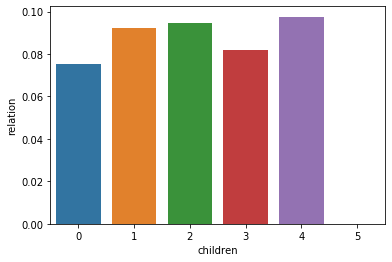

In [51]:
import seaborn # Импортируем библиотеку seaborn, чтобы построить гистаграмму
seaborn.barplot(x = children_and_debt_grouped.index, y = children_and_debt_grouped['relation']) # строим гистограмму, где по оси У  будет соотношение должников к общему количеству клиентов в категрии, а по оси  X - количество детей

**Вывод**

Несмотря на то, что должников среди семейств с 5-ю детьми не было, в целом можно утверждать, что с ростом количества детей в семье вероятность появления должников возрастает.

- Есть ли зависимость между семейным положением и возвратом кредита в срок?

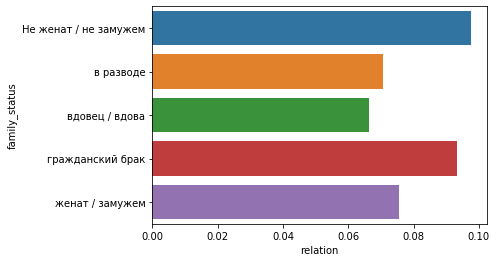

In [52]:
seaborn.barplot(x = family_status_and_debt_grouped['relation'], y = family_status_and_debt_grouped.index)

**Вывод**

Больше всего должников среди неженатых и тех, кто состоит в фактическом, незарегистрированном браке. Остальные, состоящие в браке, бывшие в браке или потерявшие супруга с чуть большей вероятностью вернут кредит вовремя. 

- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

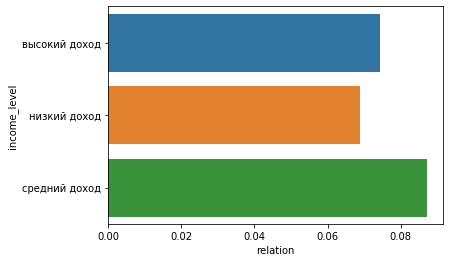

In [53]:
seaborn.barplot(x = total_income_and_debt_grouped['relation'], y = total_income_and_debt_grouped.index)

**Вывод**

Отношение должников по кредитам к общему количеству самый высокий у клиентов со средней зарплатой, а меньше всего задерживают оплату по кредитам люди с низким заработком. 

- Как разные цели кредита влияют на его возврат в срок?

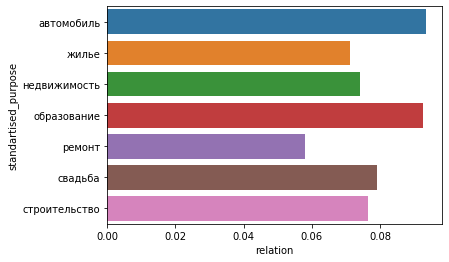

In [54]:
seaborn.barplot(x = purpose_and_debt_grouped['relation'], y = purpose_and_debt_grouped.index)

**Вывод**

Меньше всего проблем со своевременными выплатами кредита у клиентов, делающих `ремонт`. Те, кто берет кредиты на покупку, аренду или строительство `недвижимости/жилья`, равно как и тех, кто готовится к `свадьбе` - процент должников чуть больше и находится на примерно одном уровне. Самые злостные неплательщики находятся в категориях `автомобиль` и `образование`. И если студентов еще можно понять, то, интересно, какие оправдания у владельцев автомобилей?:)

## Шаг 4. Общий вывод

Целью данного исследования было определить, есть ли связь между семейным статусом клиента и количеством его детей на факт погашения кредита вовремя.

Итак, можно сказать что с наибольшей долей вероятности:
* `Вовремя оплатит кредит` человек, состоящий сейчас или в прошлом **в браке, без детей**. 

* Наименее надежным клиентом и потенциальным `должником` будет **многодетн(ый)/(ая) отец/мать-одиночка**.